## Importing Required Modules

In [1]:
import numpy as np
import pandas as pd
import statistics 
import math
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn import linear_model as lm
from sklearn import metrics as m
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics

## Visual Descriptive Tools

In [2]:
pct = pd.read_csv('Tetuan City power consumption.csv')
pct

,DateTime,Temperature,Humidity,Wind Speed,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,1/1/17 0:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
1,1/1/17 0:10,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2,1/1/17 0:20,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
3,1/1/17 0:30,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
4,1/1/17 0:40,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...
52411,12/30/17 23:10,7.010,72.4,0.080,31160.45627,26857.31820,14780.31212
52412,12/30/17 23:20,6.947,72.6,0.082,30430.41825,26124.57809,14428.81152
52413,12/30/17 23:30,6.900,72.8,0.086,29590.87452,25277.69254,13806.48259
52414,12/30/17 23:40,6.758,73.0,0.080,28958.17490,24692.23688,13512.60504


#### The DataFrame shows the power consumption of the three zones of Tetuan city measured at different time with different aspects taken into account like temprature, humidity and wind speed.

In [4]:
print(pct.info())
print(pct.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  52416 non-null  object 
 1   Temperature               52416 non-null  float64
 2   Humidity                  52416 non-null  float64
 3   Wind Speed                52416 non-null  float64
 4   Zone 1 Power Consumption  52416 non-null  float64
 5   Zone 2 Power Consumption  52416 non-null  float64
 6   Zone 3 Power Consumption  52416 non-null  float64
dtypes: float64(6), object(1)
memory usage: 2.8+ MB
None
        Temperature      Humidity    Wind Speed  Zone 1 Power Consumption  \
count  52416.000000  52416.000000  52416.000000              52416.000000   
mean      18.810024     68.259518      1.959489              32344.970564   
std        5.815476     15.551177      2.348862               7130.562564   
min        3.247000     11.34000

#### The info function gets us the structure of the dataframe by telling us it has 52416 rows and 7 columns. It also tells us the about the number of null/non-null entries, and datatype of each column.

In [5]:
pct.rename(columns = {'Zone 1 Power Consumption':'Zone 1',
                     'Zone 2 Power Consumption':'Zone 2',
                     'Zone 3 Power Consumption':'Zone 3'},inplace = True)
pct

,DateTime,Temperature,Humidity,Wind Speed,Zone 1,Zone 2,Zone 3
0,1/1/17 0:00,6.559,73.8,0.083,34055.69620,16128.87538,20240.96386
1,1/1/17 0:10,6.414,74.5,0.083,29814.68354,19375.07599,20131.08434
2,1/1/17 0:20,6.313,74.5,0.080,29128.10127,19006.68693,19668.43373
3,1/1/17 0:30,6.121,75.0,0.083,28228.86076,18361.09422,18899.27711
4,1/1/17 0:40,5.921,75.7,0.081,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...
52411,12/30/17 23:10,7.010,72.4,0.080,31160.45627,26857.31820,14780.31212
52412,12/30/17 23:20,6.947,72.6,0.082,30430.41825,26124.57809,14428.81152
52413,12/30/17 23:30,6.900,72.8,0.086,29590.87452,25277.69254,13806.48259
52414,12/30/17 23:40,6.758,73.0,0.080,28958.17490,24692.23688,13512.60504


#### Reformating the dataframe by changing names of power consumption of zones

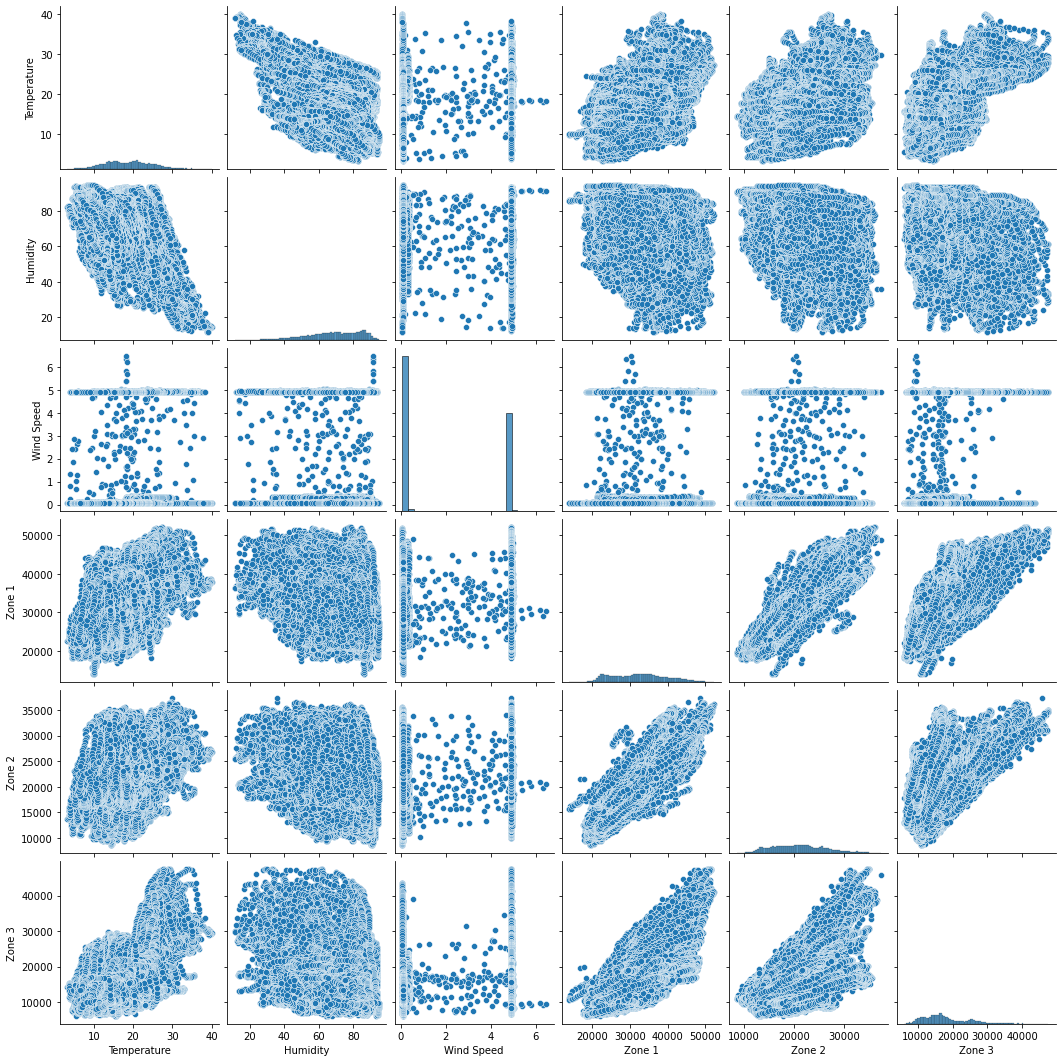

In [6]:
sns.pairplot(pct)

#### The pairplot function gives us a rough Idea of how the different variables are related to each other and what kind of correlation they might have with each other.

<AxesSubplot:>

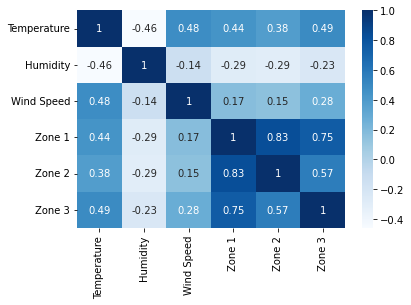

In [10]:
sns.heatmap(pct.corr(),annot=True,cmap='Blues')

#### The heat-map can easily tell us the value of r and degree of correlation by its colours.

## Zone 1 Power Consumption

In [11]:
# Method 1

X=pct[['Temperature','Humidity']]
y=pct["Zone 1"]

poly=PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(X)
model=lm.LinearRegression()
fit_model=model.fit(poly_features,y)

a1=fit_model.coef_
b1=fit_model.intercept_

predictedPE=fit_model.predict(poly_features)
pct["Predicted PE"]=predictedPE

rmse=np.sqrt(m.mean_squared_error(pct["Predicted PE"],pct["Zone 1"]))
print('R-Squared Value: ',sklearn.metrics.r2_score(pct['Zone 1'], pct['Predicted PE']))

R-Squared Value:  0.22100454058359775


In [12]:
# Method 2

x = ['Temperature' , 'Humidity']
X = pct[x]
Y = pct['Zone 1']
Y = np.log(Y)
X = sm.add_constant(X)
mod = sm.OLS(Y, X)
mod = mod.fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Zone 1   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     7294.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:24:03   Log-Likelihood:                 10417.
No. Observations:               52416   AIC:                        -2.083e+04
Df Residuals:                   52413   BIC:                        -2.080e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.1895      0.006   1581.469      

#### We see that the R-Squared value for Method 1 is more than that for Method 2. Hence, Method 1 (using Bi-variate polynomial) is the best fit model for zone 1 dataset.

## Zone 2 Power Consumption

In [13]:
# Method 1

X=pct[['Temperature']]
y=pct["Zone 2"]

poly=PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(X)
model=lm.LinearRegression()
fit_model=model.fit(poly_features,y)

a1=fit_model.coef_
b1=fit_model.intercept_

predictedPE=fit_model.predict(poly_features)
pct["Predicted PE"]=predictedPE

rmse=np.sqrt(m.mean_squared_error(pct["Predicted PE"],pct["Zone 2"]))
print('Root Mean Squared Error Value:',rmse)

Root Mean Squared Error Value: 4796.983609303166


In [14]:
# Method 2

X=pct[['Temperature','Humidity','Wind Speed']]
y=pct["Zone 2"]

model=lm.LinearRegression()
fit_model=model.fit(X,y)
predictedPE=fit_model.predict(X)
pct["Predicted PE"]=predictedPE

a2=fit_model.coef_
b2=fit_model.intercept_

rmse=np.sqrt(m.mean_squared_error(pct["Predicted PE"],pct["Zone 2"]))
print('Root Mean Squared Error Value:',rmse)

Root Mean Squared Error Value: 4753.191811175727


#### We see that the Root Mean Squared value for Method 2 is less than that for Method 1. Hence, Method 2 (using Tri-variate linear regression) is the best fit model for zone 2 dataset.

## Zone 3 Power Consumption

In [15]:
# Method 1

X=pct[['Temperature','Wind Speed']]
y=pct["Zone 3"]

poly=PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(X)

model=lm.LinearRegression()
fit_model=model.fit(poly_features,y)
predictedPE=fit_model.predict(poly_features)

pct["Predicted PE"]=predictedPE

a3=fit_model.coef_
b3=fit_model.intercept_

rmse=np.sqrt(m.mean_squared_error(pct["Predicted PE"],pct["Zone 3"]))
print('R-Squared Value: ',sklearn.metrics.r2_score(pct['Zone 3'], pct['Predicted PE']))

R-Squared Value:  0.30334858370393025


In [16]:
# Method 2

Y = np.log(Y)
X = sm.add_constant(X)
mod = sm.OLS(Y, X)
mod = mod.fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Zone 1   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     6976.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:24:07   Log-Likelihood:             1.3260e+05
No. Observations:               52416   AIC:                        -2.652e+05
Df Residuals:                   52413   BIC:                        -2.652e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.3048      0.000   7863.786      

#### We see that the R-Squared value for Method 1 is more than that for Method 2. Hence, Method 1 (using Bi-variate polynomial) is the best fit model for the dataset

## User Interface

In [17]:
print('1st Set')
t1 = float(input('Enter Temperature: '))
h1 = float(input('Enter Humidity: '))
w1 = float(input('Enter Wind Speed: '))
print('\n2nd Set')
t2 = float(input('Enter Temperature: '))
h2 = float(input('Enter Humidity: '))
w2 = float(input('Enter Wind Speed: '))
print('\n3rd Set')
t3 = float(input('Enter Temperature: '))
h3 = float(input('Enter Humidity: '))
w3 = float(input('Enter Wind Speed: '))

1st Set
Enter Temperature: 12.5
Enter Humidity: 71
Enter Wind Speed: 0.073

2nd Set
Enter Temperature: 21.8
Enter Humidity: 85.2
Enter Wind Speed: 0.068

3rd Set
Enter Temperature: 17.9
Enter Humidity: 54
Enter Wind Speed: 0.083


## Zone 1 Predictions

In [18]:
slope = []
intercept = []

for a in range(100):
    bs = pct.sample(52416,replace = True)
    X=bs[['Temperature','Humidity']]
    y=bs["Zone 1"]
    
    poly=PolynomialFeatures(degree=2,include_bias=False)
    poly_features = poly.fit_transform(X)
    model=lm.LinearRegression()
    fit_model=model.fit(poly_features,y)

    a=fit_model.coef_
    b=fit_model.intercept_
    slope.append(a)
    intercept.append(b)
A0 = []
A1 = []
A2 = []
A3 = []
A4 = []
for a in slope:
    A0.append(a[0])
    A1.append(a[1])
    A2.append(a[2])
    A3.append(a[3])
    A4.append(a[4])

In [19]:
def zone1(T,H):
    predictionList = []
    for i in range(100):
        prediction = A0[i]*T + A1[i]*H + A2[i]*T**2 + A3[i]*T*H + A4[i]*H**2 + intercept[i]
        predictionList.append(prediction)
    predictionListMedian = np.median(predictionList)
    left = np.percentile(predictionList,2.5)
    right = np.percentile(predictionList,97.5)
    return predictionListMedian,left,right

In [20]:
z1p1,l,r = zone1(t1,h1)
print('Pediction for 1st set of values',z1p1,'\nLeft end point',l,'\nRight end point',r,'\n','\n')
z1p2,l,r = zone1(t2,h2)
print('Pediction for 2nd set of values',z1p2,'\nLeft end point',l,'\nRight end point',r,'\n','\n')
z1p3,l,r = zone1(t3,h3)
print('Pediction for 3rd set of values',z1p3,'\nLeft end point',l,'\nRight end point',r,'\n','\n')

Pediction for 1st set of values 29609.430767460028 
Left end point 29529.329303279326 
Right end point 29698.73200261688 
 

Pediction for 2nd set of values 32878.472509200714 
Left end point 32764.392309838688 
Right end point 33010.76280394892 
 

Pediction for 3rd set of values 32934.05828110637 
Left end point 32842.46379651512 
Right end point 33015.571506682485 
 



## Zone 2 Predictions

In [21]:
slope = []
intercept = []

for a in range(100):
    bs = pct.sample(52416,replace = True)
    X=bs[['Temperature','Humidity','Wind Speed']]
    y=bs["Zone 2"]
    
    model=lm.LinearRegression()
    fit_model=model.fit(X,y)

    a=fit_model.coef_
    b=fit_model.intercept_
    slope.append(a)
    intercept.append(b)
A0 = []
A1 = []
A2 = []
for a in slope:
    A0.append(a[0])
    A1.append(a[1])
    A2.append(a[2])

In [22]:
def zone2(T,H,W):
    predictionList = []
    for i in range(100):
        prediction = A0[i]*T + A1[i]*H + A2[i]*W + intercept[i]
        predictionList.append(prediction)
    predictionListMedian = np.median(predictionList)
    left = np.percentile(predictionList,2.5)
    right = np.percentile(predictionList,97.5)
    return predictionListMedian,left,right

In [23]:
z2p1,l,r = zone2(t1,h1,w1)
print('Pediction for 1st set of values',z2p1,'\nLeft end point',l,'\nRight end point',r,'\n','\n')
z2p2,l,r = zone2(t2,h2,w2)
print('Pediction for 2nd set of values',z2p2,'\nLeft end point',l,'\nRight end point',r,'\n','\n')
z2p3,l,r = zone2(t3,h3,w3)
print('Pediction for 3rd set of values',z2p3,'\nLeft end point',l,'\nRight end point',r,'\n','\n')

Pediction for 1st set of values 19183.68111154931 
Left end point 19124.315898731453 
Right end point 19244.912717794006 
 

Pediction for 2nd set of values 21212.328255930704 
Left end point 21137.60118809134 
Right end point 21292.85006800645 
 

Pediction for 3rd set of values 21610.225592395807 
Left end point 21540.437874199524 
Right end point 21664.50119944815 
 



## Zone 3 Predictions

In [24]:
slope = []
intercept = []

for a in range(100):
    bs = pct.sample(52416,replace = True)
    X=bs[['Temperature','Wind Speed']]
    y=bs["Zone 3"]
    
    poly=PolynomialFeatures(degree=2,include_bias=False)
    poly_features = poly.fit_transform(X)
    model=lm.LinearRegression()
    fit_model=model.fit(poly_features,y)

    a=fit_model.coef_
    b=fit_model.intercept_
    slope.append(a)
    intercept.append(b)
A0 = []
A1 = []
A2 = []
A3 = []
A4 = []
for a in slope:
    A0.append(a[0])
    A1.append(a[1])
    A2.append(a[2])
    A3.append(a[3])
    A4.append(a[4])

In [25]:
def zone3(T,W):
    predictionList = []
    for i in range(100):
        prediction = A0[i]*T + A1[i]*W + A2[i]*T**2 + A3[i]*T*W + A4[i]*W**2 + intercept[i]
        predictionList.append(prediction)
    predictionListMedian = np.median(predictionList)
    left = np.percentile(predictionList,2.5)
    right = np.percentile(predictionList,97.5)
    return predictionListMedian,left,right

In [26]:
z3p1,l,r = zone3(t1,w1)
print('Pediction for 1st set of values',z3p1,'\nLeft end point',l,'\nRight end point',r,'\n','\n')
z3p2,l,r = zone3(t2,w2)
print('Pediction for 2nd set of values',z3p2,'\nLeft end point',l,'\nRight end point',r,'\n','\n')
z3p3,l,r = zone3(t3,w3)
print('Pediction for 3rd set of values',z3p3,'\nLeft end point',l,'\nRight end point',r,'\n','\n')

Pediction for 1st set of values 15315.342792159985 
Left end point 15242.159575420581 
Right end point 15378.600817808121 
 

Pediction for 2nd set of values 17909.95200126255 
Left end point 17788.108699503846 
Right end point 17979.13042850132 
 

Pediction for 3rd set of values 16378.443315578817 
Left end point 16306.807708525126 
Right end point 16432.025408570084 
 



## Automatic Value Updation

In [27]:
df = pd.DataFrame({'Temperature' : [t1,t2,t3],'Humidity' : [h1,h2,h3],'Wind Speed' : [w1,w2,w3],
                  'Zone 1' : [z1p1,z1p2,z1p3],
                  'Zone 2' : [z2p1,z2p2,z2p3],
                  'Zone 3' : [z3p1,z3p2,z3p3]})
pct = pct.append(df,ignore_index = True)

C:\Users\daksh\AppData\Local\Temp\ipykernel_15964\3974958396.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pct = pct.append(df,ignore_index = True)


In [28]:
del pct['Predicted PE']
del pct['DateTime']
pct

,Temperature,Humidity,Wind Speed,Zone 1,Zone 2,Zone 3
0,6.559,73.8,0.083,34055.696200,16128.875380,20240.963860
1,6.414,74.5,0.083,29814.683540,19375.075990,20131.084340
2,6.313,74.5,0.080,29128.101270,19006.686930,19668.433730
3,6.121,75.0,0.083,28228.860760,18361.094220,18899.277110
4,5.921,75.7,0.081,27335.696200,17872.340430,18442.409640
...,...,...,...,...,...,...
52414,6.758,73.0,0.080,28958.174900,24692.236880,13512.605040
52415,6.580,74.1,0.081,28349.809890,24055.231670,13345.498200
52416,12.500,71.0,0.073,29609.430767,19183.681112,15315.342792
52417,21.800,85.2,0.068,32878.472509,21212.328256,17909.952001


Link to the video:cheaters lol